In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
x=np.array([95,85,80,70,60]) 
y=np.array([85,95,70,65,70])

In [5]:
model= np.polyfit(x, y, 1)
model

array([ 0.64383562, 26.78082192])

In [6]:
predict = np.poly1d(model) 
predict(65)

68.63013698630137

In [7]:
 y_pred = predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [8]:
 from sklearn.metrics import r2_score 
r2_score(y,y_pred)


0.4803218090889322

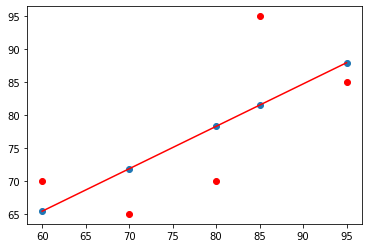

In [9]:
 y_line = model[1] + model[0]* x 
plt.plot(x,y_line,c = 'r') 
plt.scatter(x,y_pred) 
plt.scatter(x,y,c='r')


In [13]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [14]:
data = pd.DataFrame(housing.data)

In [15]:
data

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
 data.columns = housing.feature_names 
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
data['MedInc'] = housing.target

In [18]:
 data.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [19]:
x = data.drop(['MedInc'],axis = 1)
y = data['MedInc']

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.2,random_state=0)


In [27]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
lm.fit(xtrain, ytrain)


ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)


In [28]:
 df=pd.DataFrame(ytrain_pred,ytrain) 
df=pd.DataFrame(ytest_pred,ytest)


In [32]:
 from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(ytest,ytest_pred) 
print(mse)



0.8195128774610305


In [35]:
 mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)


0.7957123632209536


In [37]:
mse = mean_squared_error(ytest,ytest_pred)
print(mse)

0.8195128774610305


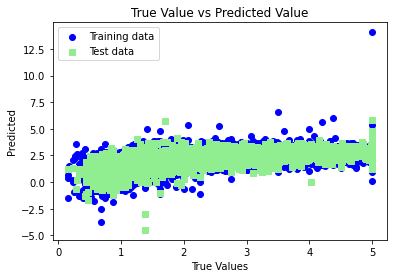

In [44]:
plt.scatter(ytrain,ytrain_pred,c='blue',marker='o',label='Training data') 
plt.scatter(ytest,ytest_pred,c='lightgreen',marker='s',label='Test data') 
plt.xlabel('True Values') 
plt.ylabel('Predicted') 
plt.title("True Value vs Predicted Value") 
plt.legend(loc='upper left') 
plt.plot() 
plt.show()